### PROBLEM STATEMENT-Most players in the automotive sector are investing in ML for their marketing efforts, a much smaller group is putting in place incentives and key performance indicators (KPIs) to use more ML and automation. Closing the gap requires a stronger commitment to developing ML capability that is not just useful but also used. Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre)

## Import Libraries

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 



### Load the dataset 

In [3]:
vehicle_df=pd.read_csv("data.csv")  
vehicle_df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


### DATA PREPARATION

In [4]:
vehicle_df.shape
#GET THE SHAPE

(398, 9)

In [5]:
vehicle_df.head(15)
#DISPLAY FIRST 15 RECORDS

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
5,1,8,429.0,198,4341,10.0,1970,ford galaxie 500,6.377156
6,1,8,454.0,220,4354,9.0,1970,chevrolet impala,5.952012
7,1,8,440.0,215,4312,8.5,1970,plymouth fury iii,5.952012
8,1,8,455.0,225,4425,10.0,1970,pontiac catalina,5.952012
9,1,8,390.0,190,3850,8.5,1970,amc ambassador dpl,6.377156


In [6]:
vehicle_df.info()
#GET THE INFORMATION OF THE DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
vehicle_df.isnull().sum()
#CHECKING FOR MISSING VALUES

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [8]:
vehicle_df.horsepower.unique()
#GET THE UNIQUE VALUES OF HORESPOWER COLUMN

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
vehicle_df.name.value_counts()

ford pinto                    6
amc matador                   5
toyota corolla                5
ford maverick                 5
toyota corona                 4
                             ..
mercury cougar brougham       1
ford granada gl               1
ford f250                     1
plymouth volare premier v8    1
buick century 350             1
Name: name, Length: 305, dtype: int64

In [10]:
#dropping name 
vehicle_df = vehicle_df.drop('name', axis=1)

In [11]:
#replacing the categorical variable with actual values
vehicle_df['origin'] = vehicle_df['origin'].replace({1: 'india', 2: 'korea', 3: 'japan'})
vehicle_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,india,8,307.0,130,3504,12.0,1970,7.652587
1,india,8,350.0,165,3693,11.5,1970,6.377156
2,india,8,318.0,150,3436,11.0,1970,7.652587
3,india,8,304.0,150,3433,12.0,1970,6.802299
4,india,8,302.0,140,3449,10.5,1970,7.227443


In [12]:
#One hot encoding
vehicle_df = pd.get_dummies(vehicle_df, columns=['origin'])
vehicle_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
0,8,307.0,130,3504,12.0,1970,7.652587,1,0,0
1,8,350.0,165,3693,11.5,1970,6.377156,1,0,0
2,8,318.0,150,3436,11.0,1970,7.652587,1,0,0
3,8,304.0,150,3433,12.0,1970,6.802299,1,0,0
4,8,302.0,140,3449,10.5,1970,7.227443,1,0,0


In [13]:
hpIsDigit = pd.DataFrame(vehicle_df.horsepower.str.isdigit())  
vehicle_df[hpIsDigit['horsepower'] == False] 

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
32,4,98.0,?,2046,19.0,1971,10.628593,1,0,0
126,6,200.0,?,2875,17.0,1974,8.928018,1,0,0
330,4,85.0,?,1835,17.3,1980,17.388378,0,0,1
336,4,140.0,?,2905,14.3,1980,10.033391,1,0,0
354,4,100.0,?,2320,15.8,1981,14.667458,0,0,1
374,4,151.0,?,3035,20.5,1982,9.778305,1,0,0


In [14]:
vehicle_df = vehicle_df.replace('?', np.nan)
vehicle_df[hpIsDigit['horsepower'] == False] 


,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
32,4,98.0,NaN,2046,19.0,1971,10.628593,1,0,0
126,6,200.0,NaN,2875,17.0,1974,8.928018,1,0,0
330,4,85.0,NaN,1835,17.3,1980,17.388378,0,0,1
336,4,140.0,NaN,2905,14.3,1980,10.033391,1,0,0
354,4,100.0,NaN,2320,15.8,1981,14.667458,0,0,1
374,4,151.0,NaN,3035,20.5,1982,9.778305,1,0,0


In [15]:
vehicle_df.median()
#GET THE MEDIAN OF THE COLUMNS

cylinders                 4.000000
displacement            148.500000
horsepower               93.500000
weight                 2803.500000
acceleration             15.500000
year                   1976.000000
Kilometer_per_liter       9.778305
origin_india              1.000000
origin_japan              0.000000
origin_korea              0.000000
dtype: float64

In [16]:
corr_matrix=vehicle_df.corr()
corr_matrix
#GET THE CORRELATION MATRIX

,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
cylinders,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396,0.604351,-0.396479,-0.352861
displacement,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203,0.651407,-0.433505,-0.373886
weight,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741,0.598398,-0.440817,-0.298843
acceleration,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289,-0.250806,0.109144,0.204473
year,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267,-0.139883,0.193101,-0.024489
Kilometer_per_liter,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000,-0.568192,0.442174,0.259022
origin_india,0.604351,0.651407,0.598398,-0.250806,-0.139883,-0.568192,1.000000,-0.643317,-0.597198
origin_japan,-0.396479,-0.433505,-0.440817,0.109144,0.193101,0.442174,-0.643317,1.000000,-0.229895
origin_korea,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,0.259022,-0.597198,-0.229895,1.000000


In [17]:
corr_matrix['Kilometer_per_liter'].sort_values(ascending=False)

Kilometer_per_liter    1.000000
year                   0.579267
origin_japan           0.442174
acceleration           0.420289
origin_korea           0.259022
origin_india          -0.568192
cylinders             -0.775396
displacement          -0.804203
weight                -0.831741
Name: Kilometer_per_liter, dtype: float64

In [18]:
#instead of dropping the rows, lets replace the missing values with median value.
medianFiller = lambda x: x.fillna(x.median())
vehicle_df = vehicle_df.apply(medianFiller,axis=0)

vehicle_df['horsepower'] = vehicle_df['horsepower'].astype('float64')
vehicle_df.sample(5)

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
262,8,305.0,145.0,3425,13.2,1978,8.162759,1,0,0
228,6,250.0,98.0,3525,19.0,1977,7.865159,1,0,0
391,4,135.0,84.0,2370,13.0,1982,15.305173,1,0,0
387,6,262.0,85.0,3015,17.0,1982,16.155461,1,0,0
281,6,200.0,85.0,2990,18.2,1979,8.417845,1,0,0


In [19]:
vehicle_df.describe(include = "all")

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_india,origin_japan,origin_korea
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,1976.010050,9.997073,0.625628,0.198492,0.175879
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,3.322917,0.484569,0.399367,0.381197
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293,0.000000,0.000000,0.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015,0.000000,0.000000,0.000000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,9.778305,1.000000,0.000000,0.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697,1.000000,1.000000,1.000000


<AxesSubplot:>

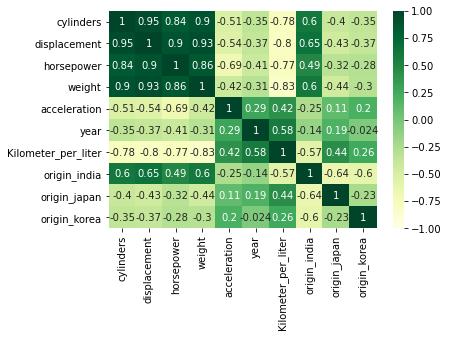

In [20]:
sns.heatmap(data = vehicle_df.corr(), cmap = "YlGn", vmin = -1, vmax = 1, annot = True)
#VISUALIZING CORRELATION USING HEATMAP

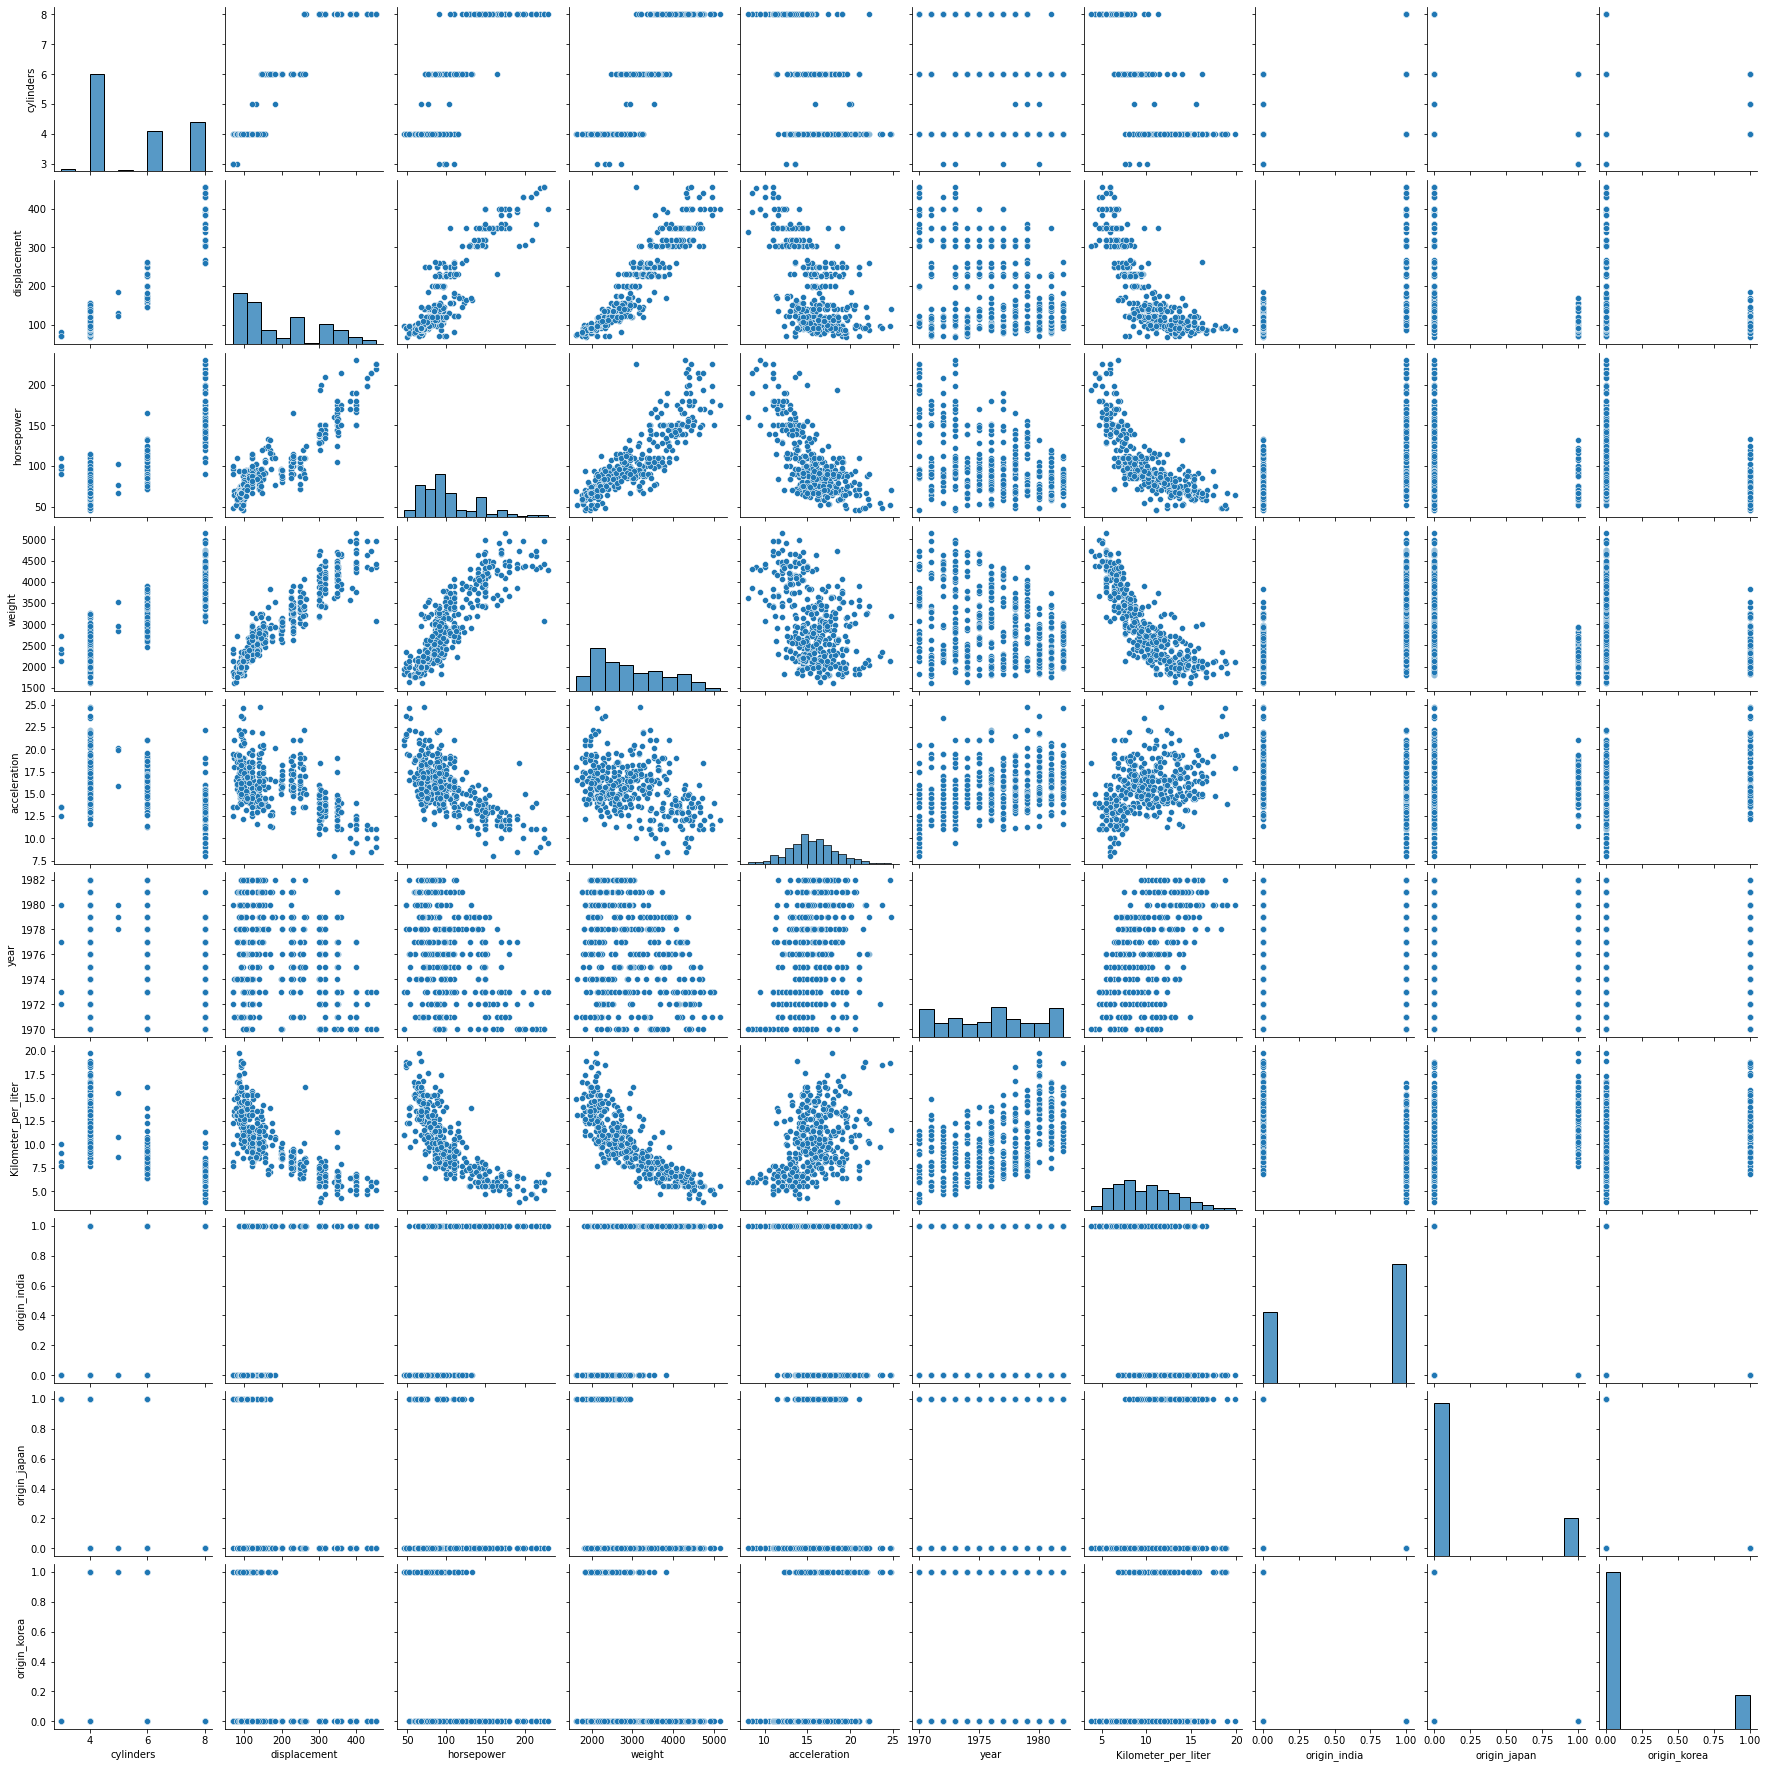

In [21]:
sns.pairplot(data=vehicle_df)


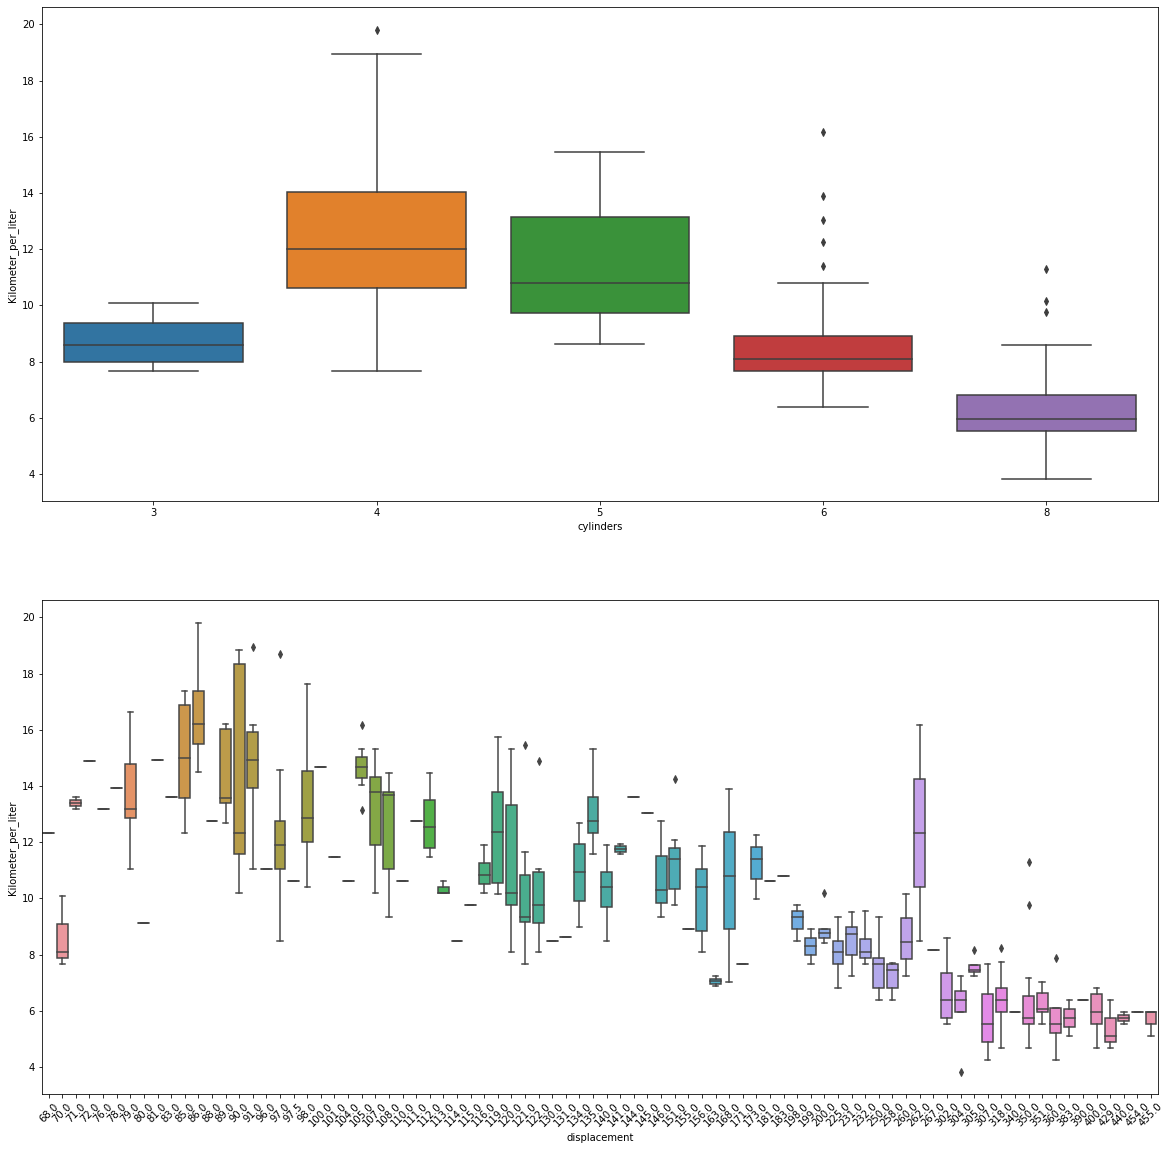

In [24]:
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize= (20,20))
for i,j in zip(vehicle_df.columns, ax.flatten()):
    sns.boxplot(data = vehicle_df, x = i, y = "Kilometer_per_liter", ax = j)
    plt.xticks(rotation = 45)
plt.show()

In [ ]:
vehicle_df_dummy = pd.get_dummies(vehicle_df,drop_first = True)
vehicle_df_dummy
#ONE HOT ENCODING

In [25]:
from scipy.stats import shapiro
stats, p = shapiro(vehicle_df.Kilometer_per_liter)
print("Statistics = %.3f, P-value = %.7f" % (stats,p))

Statistics = 0.968, P-value = 0.0000001


<AxesSubplot:>

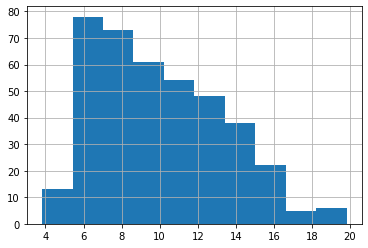

In [26]:
vehicle_df.Kilometer_per_liter.hist()

### BUILD THE MODEL

In [60]:
x = vehicle_df.drop(['Kilometer_per_liter'], axis=1)
# the dependent variable
y = vehicle_df[['Kilometer_per_liter']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [62]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
#LINEAR REGRESSION MODEL

LinearRegression()

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cylinders is -0.16785012245832123
The coefficient for displacement is 0.012306001760302193
The coefficient for horsepower is -0.00924781423638226
The coefficient for weight is -0.003125670169322982
The coefficient for acceleration is 0.02632462882621092
The coefficient for year is 0.35581717761880594
The coefficient for origin_india is -0.7647694799978436
The coefficient for origin_japan is 0.2535623779377385
The coefficient for origin_korea is 0.5112071020601052


In [64]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -684.336938770026


In [65]:
reg_model.score(X_train, y_train)
#TRAINING

0.8141025501610553

In [66]:
reg_model.score(X_test, y_test)
#TESTING

0.843313513280884

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))
#FINDING WHETHER CAN WE FIT IT WITH A CURVE USING POLYNOMIAL REGRESSION

0.9015443640943142


In [68]:
print(poly_clf.score(X_test2, y_test))

0.8650763302993869


In [69]:
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)


#### SCALING

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = vehicle_df.drop(["Kilometer_per_liter"], axis = 1)
X = scaler.fit_transform(x)
Y = vehicle_df
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [71]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.1, max_iter = 400)

In [72]:
sgd.fit(x_train, y_train.Kilometer_per_liter)
y_sgd_pred_normal = sgd.predict(x_test)
r_sgd_normal = sgd.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_sgd_normal)
mean_absolute_error_sgd_normal = mean_absolute_error(y_sgd_pred_normal,y_test.Kilometer_per_liter)
print("mean_absolute_error= " ,mean_absolute_error_sgd_normal)

R-squared =  0.7308344793823809
mean_absolute_error=  1.3070350062633176


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings

In [74]:
ols = LinearRegression()
ols.fit(x_train, y_train.Kilometer_per_liter)
y_ols_pred_normal = ols.predict(x_test)
r_ols_normal = ols.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_ols_normal)
y_ols_pred_exp = np.exp(y_ols_pred_normal)
mean_absolute_error_ols_normal = mean_absolute_error(y_ols_pred_exp,y_test.Kilometer_per_liter)
print("mean_absolute_error = ", mean_absolute_error_ols_normal)

R-squared =  0.8307811756286356
mean_absolute_error =  467544.5259741975


In [75]:
model_summary = {"Model": [ "SGD Normal Model",
                            "OLS Normal Model"],
                "R-Squared": [r_sgd_normal,r_ols_normal],
                "mean_absolute_error":[mean_absolute_error_sgd_normal,mean_absolute_error_ols_normal]}
pd.DataFrame(model_summary)

,Model,R-Squared,mean_absolute_error
0,SGD Normal Model,0.730834,1.307035
1,OLS Normal Model,0.830781,467544.525974


In [76]:
from sklearn.linear_model import SGDRegressor
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

sgd1 = SGDRegressor(loss = "squared_loss", alpha = 0.1, max_iter = 400)


In [77]:
sgd1.fit(x_train, y_train.Kilometer_per_liter)
y_sgd1_pred_normal = sgd1.predict(x_test)
r_sgd1_normal = sgd1.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_sgd1_normal)
rmse_sgd1_normal = rmse(y_sgd1_pred_normal,y_test.Kilometer_per_liter)
print("rmse= " ,rmse_sgd1_normal)

R-squared =  0.7307739439603711
rmse=  1.751526629212066


In [78]:
ols1 = LinearRegression()
ols1.fit(x_train, y_train.Kilometer_per_liter)
y_ols1_pred_normal = ols1.predict(x_test)
r_ols1_normal = ols1.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_ols1_normal)
y_ols1_pred_exp = np.exp(y_ols1_pred_normal)
rmse_ols1_normal = rmse(y_ols1_pred_exp,y_test.Kilometer_per_liter)
print("rmse = ", rmse_ols1_normal)

R-squared =  0.8307811756286356
rmse =  1148560.0859527474


In [79]:
model_summary = {"Model": [ "SGD Normal Model",
                            "OLS Normal Model"],
                "R-Squared": [r_sgd1_normal,r_ols_normal],
                "Rmse":[rmse_sgd1_normal,rmse_ols1_normal]}
pd.DataFrame(model_summary)

,Model,R-Squared,Rmse
0,SGD Normal Model,0.730774,1.751527e+00
1,OLS Normal Model,0.830781,1.148560e+06


In [ ]:
# based upon the value of R Squared the OlS model is considered as best-(a higher r-squared indicates a better fit for the model).